# This library is built on top of LangGraph
see this for pictures  https://github.com/langchain-ai/langgraph-supervisor-py?tab=readme-ov-file#customizing-handoff-tools

In [ ]:

from langgraph_supervisor import create_supervisor,create_handoff_tool
from langgraph.prebuilt import create_react_agent

from dotenv import load_dotenv
import os


load_dotenv()
api_key2 = os.getenv("GEMINI_API_KEYY")

from langchain_google_genai import ChatGoogleGenerativeAI
# model = ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite",google_api_key=  api_key2 )
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash",google_api_key=  api_key2 )

model.invoke("hi").content


'Hi there! How can I help you today?'

In [28]:

# Create specialized agents

def add(a: float, b: float) -> float:
    """Add two numbers."""
    return a + b

def multiply(a: float, b: float) -> float:
    """Multiply two numbers."""
    return a * b

def web_search(query: str) -> str:
    """Search the web for information."""
    return (
        "Here are the headcounts for each of the FAANG companies in 2024:\n"
        "1. **Facebook (Meta)**: 67,317 employees.\n"
        "2. **Apple**: 164,000 employees.\n"
        "3. **Amazon**: 1,551,000 employees.\n"
        "4. **Netflix**: 14,000 employees.\n"
        "5. **Google (Alphabet)**: 181,269 employees."
    )


In [33]:

math_agent = create_react_agent(
    model=model,
    tools=[add, multiply],
    name="math_expert",
    prompt="You are a math expert. Always use one tool at a time.  if two required then use first only."
)

research_agent = create_react_agent(
    model=model,
    tools=[web_search],
    name="research_expert",
    prompt="You are a world class researcher with access to web search. Do not do any math."
)



In [ ]:
# Create supervisor workflow
workflow = create_supervisor(
    [research_agent, math_agent],
    model=model,
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent."
    )
)

# Compile and run
app = workflow.compile()


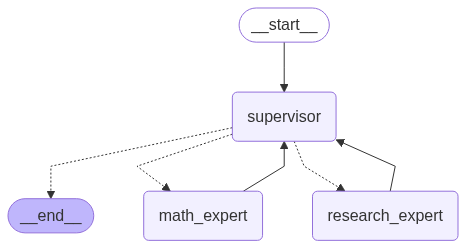

In [18]:
workflow.compile()


In [19]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what is 5 +19?  "
        }
    ]
})


Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


In [20]:
result

{'messages': [HumanMessage(content='what is 5 +19?  ', additional_kwargs={}, response_metadata={}, id='2860a503-45a7-432d-810d-4af7b6d2fb76'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'transfer_to_math_expert', 'arguments': '{}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash-lite', 'safety_ratings': []}, name='supervisor', id='run--0b955a8a-f379-4645-a2dd-93d49454d3c5-0', tool_calls=[{'name': 'transfer_to_math_expert', 'args': {}, 'id': 'b6aeb99e-4882-422b-808c-88a323bc22c5', 'type': 'tool_call'}]),
  ToolMessage(content='Successfully transferred to math_expert', name='transfer_to_math_expert', id='c34d24c9-b91d-4ecc-b057-549cc9c66d2d', tool_call_id='b6aeb99e-4882-422b-808c-88a323bc22c5'),
  AIMessage(content='5 + 19 = 24', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'g

In [ ]:
# this shit didnt worked

result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what is 5 +19? and then multiplying by 2"
        }
    ]
})


# full history

In [ ]:
workflow = create_supervisor(
    [research_agent, math_agent],
    model=model,
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent.  If one tool requires more than one calls do it in sequence not at once."
    ),
    output_mode="full_history",
    add_handoff_messages=True,
     handoff_tool_prefix="delegate_to",# okay
)

app = workflow.compile()

In [ ]:


result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what is 5 +19? "
        }
    ]
})


Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


In [32]:
result

{'messages': [HumanMessage(content='what is 5 +19? ', additional_kwargs={}, response_metadata={}, id='c581987d-f99d-43fe-9212-aeb89c1f10c8'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'transfer_to_math_expert', 'arguments': '{}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, name='supervisor', id='run--38f01e94-f3a1-4bb8-a8ea-85d1a3b7c6a9-0', tool_calls=[{'name': 'transfer_to_math_expert', 'args': {}, 'id': '6397bf49-34e9-47b6-a74f-24fd445a3aec', 'type': 'tool_call'}]),
  ToolMessage(content='Successfully transferred to math_expert', name='transfer_to_math_expert', id='8d9eeb35-bea6-4af9-81f8-b8a17542090e', tool_call_id='6397bf49-34e9-47b6-a74f-24fd445a3aec'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 5.0, "b": 19.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_rat

In [35]:
# this shit didnt worked

result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what is 5 +19? and then  multiply  with 2 "
        }
    ]
})


Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


In [36]:
result

{'messages': [HumanMessage(content='what is 5 +19? and then  multiply  with 2 ', additional_kwargs={}, response_metadata={}, id='fd60c200-4863-432f-bf02-0232ed615862'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'transfer_to_math_expert', 'arguments': '{}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, name='supervisor', id='run--0151afcd-ee2c-40bb-8160-fa7ce970bda9-0', tool_calls=[{'name': 'transfer_to_math_expert', 'args': {}, 'id': '64cb46cd-47f2-4a95-bf5b-f21bcdba2fe4', 'type': 'tool_call'}]),
  ToolMessage(content='Successfully transferred to math_expert', name='transfer_to_math_expert', id='68afba45-be11-4264-99ed-c9994b57c8ce', tool_call_id='64cb46cd-47f2-4a95-bf5b-f21bcdba2fe4'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 5.0, "b": 19.0}'}}, response_metadata={'prompt_feedback': {'bl

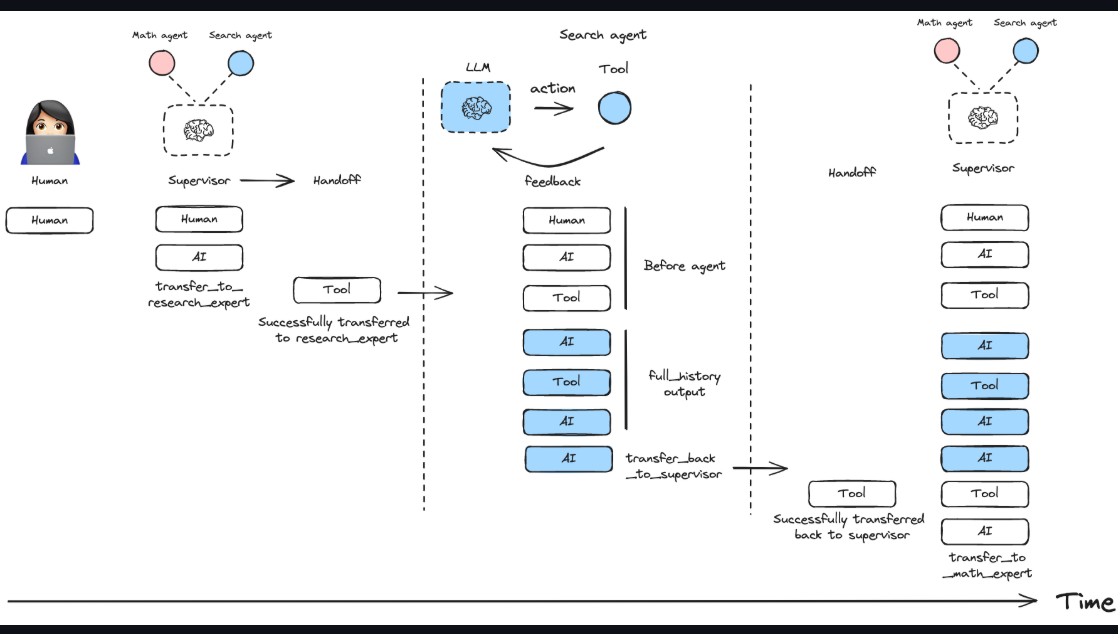

### in above the last supervisor got the message but it said acknowledged.

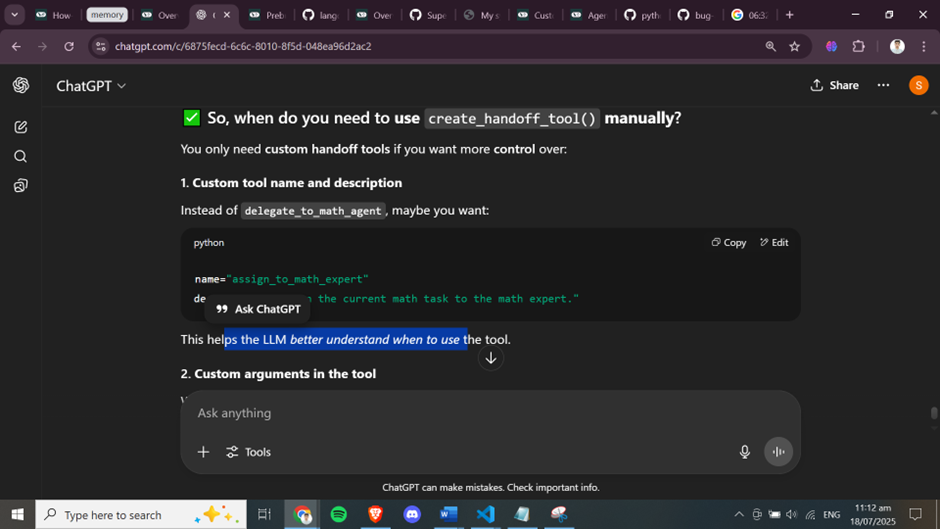
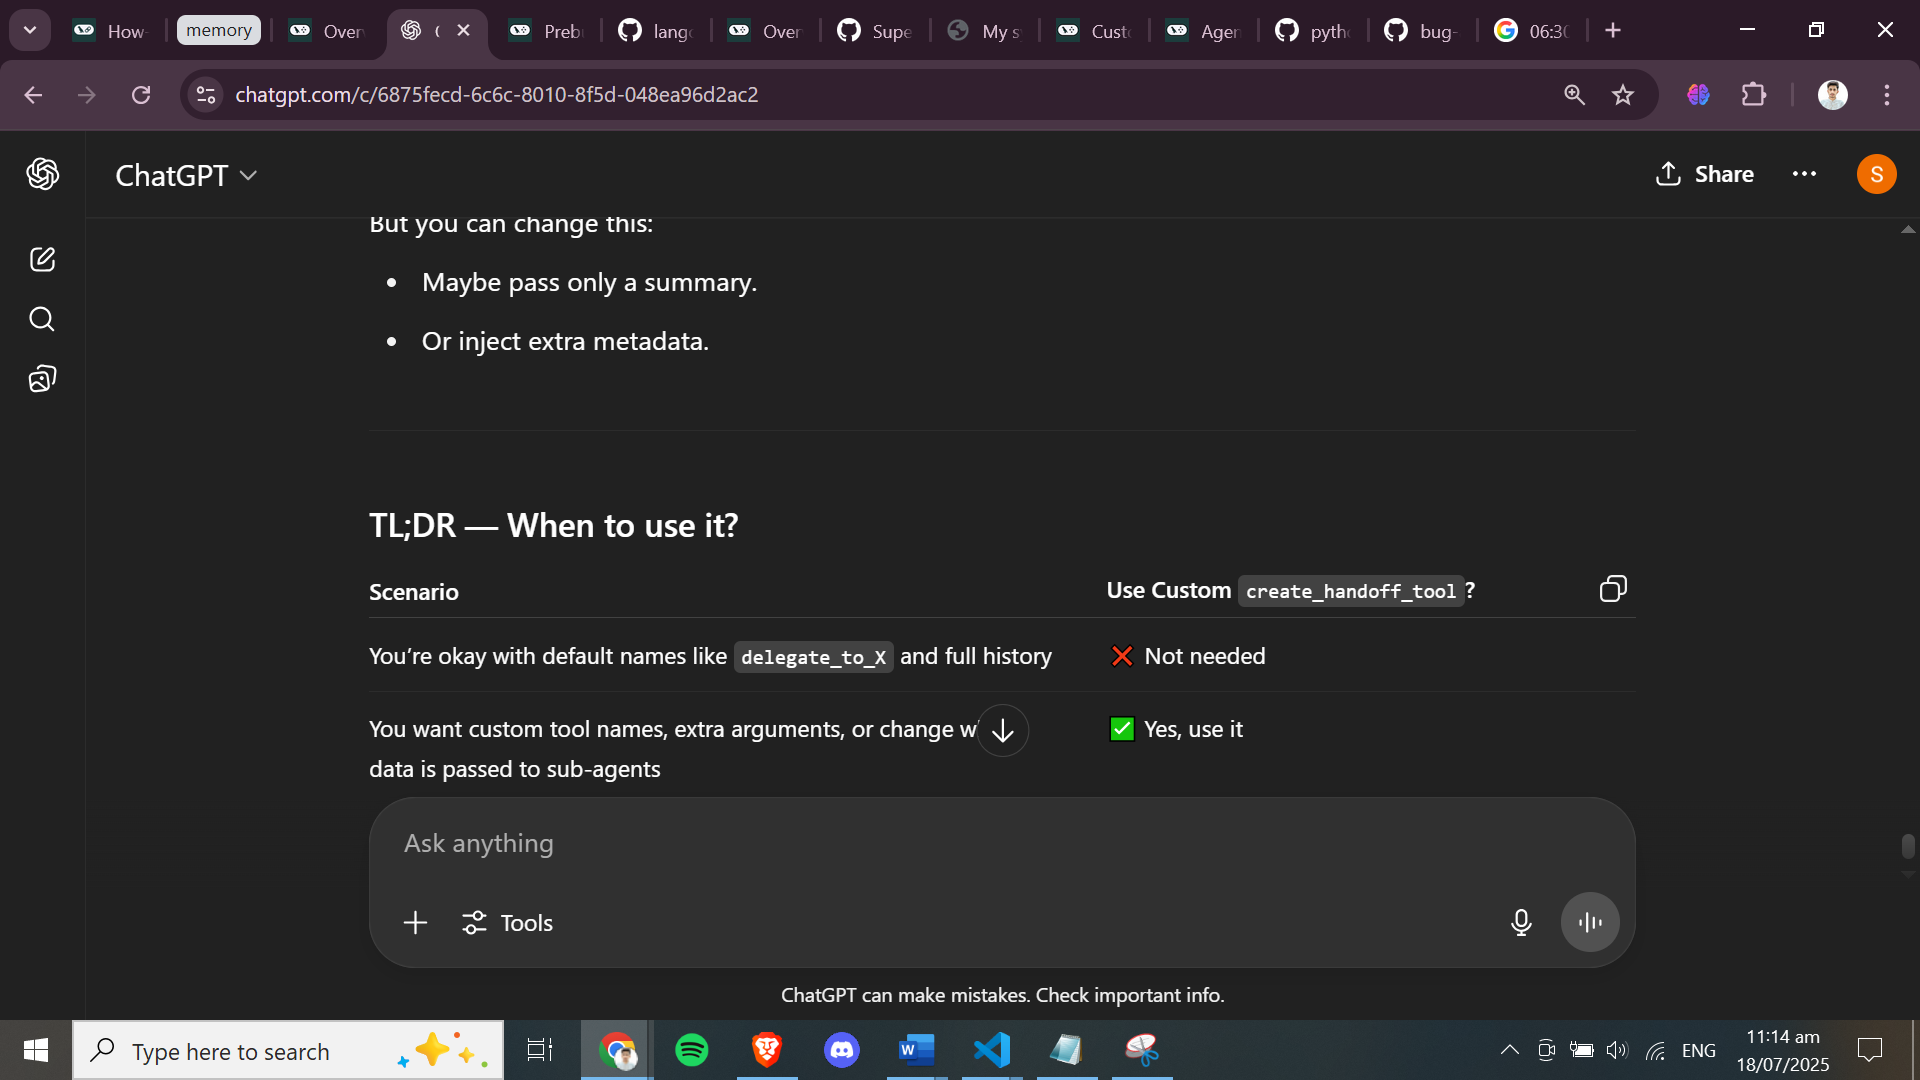

# Message Forwarding
### if tool is already answerd then go here

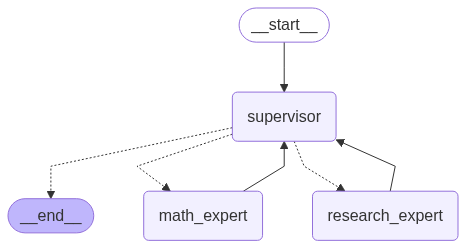

In [40]:
from langgraph_supervisor.handoff import create_forward_message_tool


forwarding_tool = create_forward_message_tool("supervisor") # The argument is the name to assign to the resulting forwarded message
workflow = create_supervisor(
    [research_agent, math_agent],
    model=model,
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent.  If one tool requires more than one calls do it in sequence not at once."
    ),
    output_mode="full_history",
    add_handoff_messages=True,
    handoff_tool_prefix="delegate_to",# okay
   
   
    tools=[forwarding_tool]
    
)

workflow.compile()


In [41]:
app = workflow.compile()

In [42]:
# this shit didnt worked

result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what is 5 +19? and then  multiply  with 2 "
        }
    ]
})


Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


In [43]:
result

{'messages': [HumanMessage(content='what is 5 +19? and then  multiply  with 2 ', additional_kwargs={}, response_metadata={}, id='ea0a643f-32c3-4fc1-b35d-66fe066aa917'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'delegate_tomath_expert', 'arguments': '{}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, name='supervisor', id='run--5c8ab98f-6064-4cbd-8847-e2dc82bbf01c-0', tool_calls=[{'name': 'delegate_tomath_expert', 'args': {}, 'id': '6e1cba58-6bb6-4c65-9d9d-999adf34a92b', 'type': 'tool_call'}]),
  ToolMessage(content='Successfully transferred to math_expert', name='delegate_tomath_expert', id='199b3a78-1d49-4c04-abda-ad848d971854', tool_call_id='6e1cba58-6bb6-4c65-9d9d-999adf34a92b'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 5.0, "b": 19.0}'}}, response_metadata={'prompt_feedback': {'block

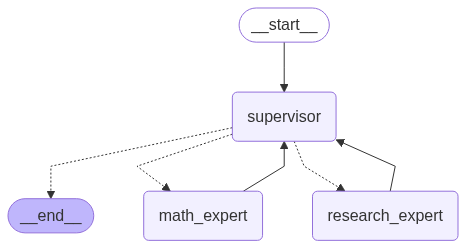

In [ ]:
from langgraph_supervisor.handoff import create_forward_message_tool


forwarding_tool = create_forward_message_tool("supervisor") # The argument is the name to assign to the resulting forwarded message
workflow = create_supervisor(
    [research_agent, math_agent],
    model=model,
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent.  If one tool requires more than one calls do it in sequence not at once."
        "If the agent already replied clearly, forward their response using the tool `forward_message_to_supervisor`." # prompt is very important

    ),
    output_mode="full_history",
    add_handoff_messages=True,
    handoff_tool_prefix="delegate_to",# okay
   
   
    tools=[forwarding_tool]
    
)

workflow.compile()


In [45]:
# this shit didnt worked
app = workflow.compile()
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what is 5 +19? and then  multiply  with 2 "
        }
    ]
})
result

Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel is_last_step, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel branch:to:__end__, ignoring it.


{'messages': [HumanMessage(content='what is 5 +19? and then  multiply  with 2 ', additional_kwargs={}, response_metadata={}, id='2397e09f-ce01-4c68-b2ac-c57f9e34b06b'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'delegate_tomath_expert', 'arguments': '{}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, name='supervisor', id='run--8466d2c1-2c89-40ab-8478-99b185ff1a75-0', tool_calls=[{'name': 'delegate_tomath_expert', 'args': {}, 'id': '0e16221c-2875-44d9-a61e-8b4b73ffaff1', 'type': 'tool_call'}]),
  ToolMessage(content='Successfully transferred to math_expert', name='delegate_tomath_expert', id='5eb1ba1a-9e18-4721-99c0-6b60a082d705', tool_call_id='0e16221c-2875-44d9-a61e-8b4b73ffaff1'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 5.0, "b": 19.0}'}}, response_metadata={'prompt_feedback': {'block

# so this solved the extra token cost

In [ ]:
from typing import Annotated

from langchain_tavily import TavilySearch
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

tool = TavilySearch(max_results=2)
tools = [tool]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chSatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()